# Numerical Optimization (CS215300) Assignment 2
## Introduction
In this assignment, we expect you to be familiar with the Pytorch optimizer library. We are using the Rosenbrock function as the benchmark of our optimization algorithms again. Since this is a simple test on very small scale, CUDA is not needed. You need to install Pytorch to acquire the pre-defined optimizers.  
The library document link: https://pytorch.org/docs/stable/optim.html

## Task
1. Please try different optimizers and observe the behavior of them, and try different hyperparameters and observe if they behave differently. (In case of L-BFGS, the parameters wrapped in this sample code won't work. If you want to try it anyway, you will need to write your own code.)
2. Whether if your setting converges or not, please justify it by experiment or your hyperthesis.
3. Please answer the following question in your report:  
    (a) What is the relation between SGD and GD(gradient descent) in our case, i.e. when the input is one-dimensional?  
    (b) Have you found effective way to set hyperparameters so they can iterate faster toward the minimum point?
4. Please write a concise report about your experiments and analysis. If you need to plot tables, please check the following link: https://www.tablesgenerator.com/markdown_tables

##  Advanced Technique: Learning rate scheduler
Another technique to find hyperparameter for learning rate is to perform scheduled adjestments of learning rate. This is called 'learning rate scheduler'. The adjestments here not only affected by current learning rate and momentum etc., but also the epoch number or step numbers. Usually, in these kind of method, we are presuming the optimal hyperparameters can be found by recognizing certain patterns, and we schedule the experiments to search the proper parameters in such manner. You can also apply these function in your code. The library document of learning rate scheduler is in the same link above.



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim

In [3]:
def rosenbrock(tensor):
    x, y = tensor
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

def execute_steps(func, initial_state, optimizer_class, optimizer_config, num_iter=500):
    x = torch.Tensor(initial_state).requires_grad_(True)
    optimizer = optimizer_class([x], **optimizer_config)
    steps = []
    steps = np.zeros((2, num_iter))
    steps[:, 0] = np.array(initial_state)
    for i in range(0, num_iter):
        optimizer.zero_grad()
        f = func(x)
        f.backward(create_graph=True, retain_graph=True)
        torch.nn.utils.clip_grad_norm_(x, 1.0)
        optimizer.step()
        steps[:, i] = x.detach().numpy()
    return steps

def plot_rosenbrok(grad_iter, optimizer_name):
    x = np.linspace(-2, 2, 250)
    y = np.linspace(-1, 3, 250)
    minimum = (1.0, 1.0)

    X, Y = np.meshgrid(x, y)
    Z = rosenbrock([X, Y])

    iter_x, iter_y = grad_iter[0, :], grad_iter[1, :]

    fig = plt.figure(figsize=(8, 8))

    ax = fig.add_subplot(1, 1, 1)
    ax.contour(X, Y, Z, 90, cmap='jet')
    ax.plot(iter_x, iter_y, color='r', marker='x')

    ax.set_title('{} with {} iterations'.format(optimizer_name, len(iter_x)))
    plt.plot(*minimum, 'gD')
    plt.plot(iter_x[-1], iter_y[-1], 'rD')
    plt.show()

In [4]:
def printX(steps):
    iter_x, iter_y = steps[0, :], steps[1, :]
    i= 0
    for x,y in zip(iter_x,iter_y):
        print("iteration %d: [%.4f %.4f]" %(i,x,y))
        i+=1

In [5]:
initial_state = np.array([-2,2])
def experiment(optimizer, hyperparameters, iters):
    steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer,
        hyperparameters,
        num_iter = iters
    )
    plot_rosenbrok(steps, optimizer.__name__)

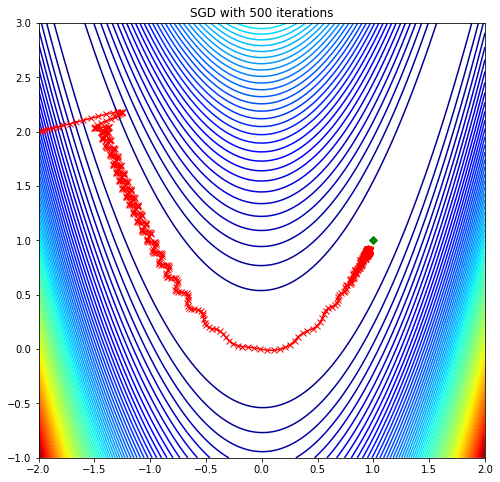

In [8]:
experiment(optimizer = optim.SGD, hyperparameters = {'lr':0.01, 'momentum':0.9}, iters = 500)

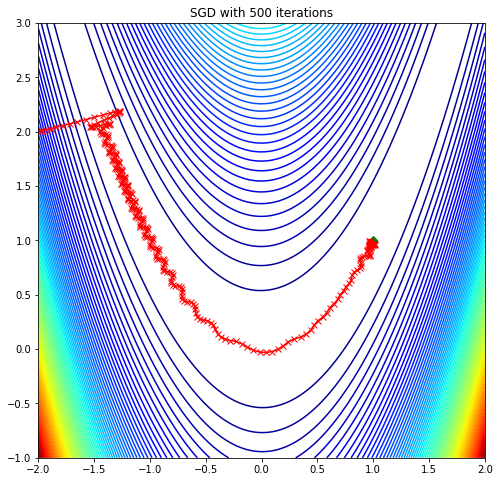

In [ ]:
experiment(optimizer = optim.SGD, hyperparameters = {'lr':0.0125, 'momentum':0.9}, iters = 500)

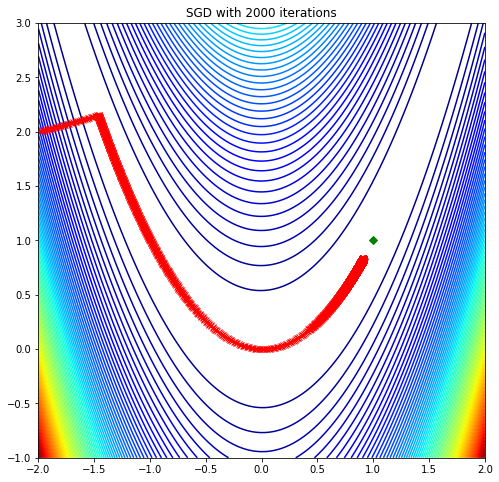

In [ ]:
experiment(optimizer = optim.ASGD, hyperparameters = {'lr':0.0125}, iters = 2000)

## Report